# Plotting Phase fraction vs T

## Libraries

In [1]:
from pycalphad import Database, equilibrium, variables as v
import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend

### Defining file paths for database

In [2]:
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

### Load database

In [25]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database
dbf = Database(dbf_diretory + 'COST507_Original.tdb') #Aluminum database

### Determine phases

In [26]:
#phases = ['LIQUID', 'FCC_A1', 'DIAMOND_A4'] #For Al-Si
#phases = ['LIQUID', 'FCC_A1', 'DIAMOND_A4'] #For Al-Si
# phases = ['LIQUID', 'FCC_A1', 'DIAMOND_A4', 'AL3M_DO22',] #For Al-Si

phases = list(dbf.phases.keys())
print(phases)

['LIQUID', 'ALB2', 'ALB12_ALPHA', 'ALB12_BETA', 'AL4C3', 'AL4SIC4', 'AL8SIC7', 'AL2_CEND', 'AL11_CEND3L', 'AL11_CEND3H', 'AL_CEND3L', 'AL_CEND3H', 'AL3_CEND', 'AL_CEND', 'ALCE_AMORPHOUS', 'ALCR2', 'AL4CR', 'AL8CR5_H', 'AL8CR5_L', 'AL9CR4_H', 'AL9CR4_L', 'AL11CR2', 'AL13CR2', 'ALCU_DELTA', 'ALCU_EPSILON', 'ALCU_ETA', 'ALCU_THETA', 'ALCU_PRIME', 'ALCU_ZETA', 'ALCULI_TB', 'ALCULI_R', 'ALCULI_T1', 'ALCULI_T2', 'ALCUZN_T', 'AL13FE4', 'AL2FE', 'AL5FE2', 'AL5FE4', 'ALFESI_ALPHA', 'ALFESI_BETA', 'ALFESI_GAMMA', 'ALFESI_DELTA', 'ALFESI_TAU1', 'ALFESI_TAU3', 'ALLI', 'AL2LI3', 'AL4LI9', 'AL12MG17', 'ALLIMG_TAU', 'ALMG_BETA', 'ALMG_EPS', 'ALMG_GAMMA', 'ALMGMN_T', 'AL11MN4', 'AL12MN', 'AL4MN', 'AL6MN', 'AL8MN5_D810', 'ALMNSI_ALPHA', 'ALMNSI_BETA', 'ALMNSI_DELTA', 'AL12MO', 'AL4MO', 'AL5MO', 'AL63MO37', 'AL8MO3', 'ALMO', 'ALN', 'ALND_AMORPHOUS', 'ALND2', 'ALSNZR', 'ALTI', 'ALM_D019', 'AL2TI', 'AL3M_D022', 'ALSN2ZR5', 'AL3TA2_L', 'AL3TA2_H', 'AL11TI5', 'AL7V', 'AL8V5', 'AL10V', 'AL23V4', 'AL12W', 'AL

In [33]:
# For specifying in terms of mass fractions; can also specify in mole fractions using v.X
# mass_fracs = {v.W('CR'): 18./100, v.W('NI'): 8.0/100}
# mass_fracs = {v.W('SI'): 10./100, v.W('MG'): 3/100}
mass_fracs = {v.W('ZR'): 10/100}
# mass_fracs = {v.W('SI'): 12.0/100, v.W('CU'): 4.2/100, v.W('FE'): 0.6/100, v.W('MG'): 0.3/100, v.W('MN'): 0.4/100, v.W('ZN'): 0.8/100, v.W('NI'): 0.01/100, v.W('TI'): 1./100}


conds = v.get_mole_fractions(mass_fracs, 'AL', dbf)

conds[v.T] = (200, 2000, 1) # Kelvin
conds[v.P] = 1e5 # Pa
conds[v.N] = 1
eq = equilibrium(dbf, ['ZR', 'AL','VA'], phases, conds)
# eq = equilibrium(dbf, ['SI', 'CU', 'FE', 'MG', 'MN', 'ZN', 'NI', 'TI', 'AL',  'VA'], phases, conds)

In [34]:
phases = sorted(set(eq.Phase.values.flatten()) - {''})
phase_handles, phasemap = phase_legend(phases)
print (phases)

[np.str_('FCC_A1'), np.str_('LIQUID')]


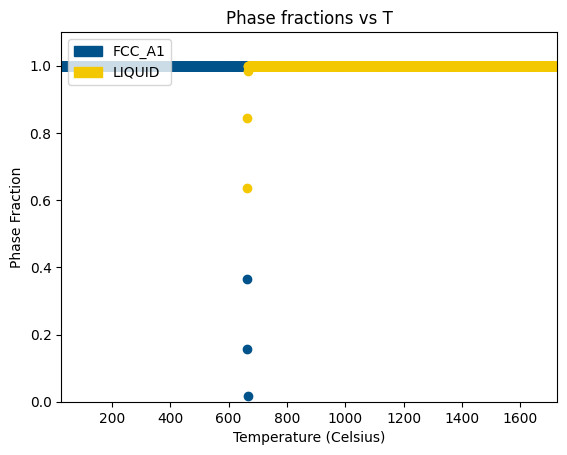

In [32]:
plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((300-273.15, 2000-273.15))

for name in phases:
    plt.scatter(eq.T.broadcast_like(eq.NP)-273.15, eq.NP.where(eq.Phase == name), color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='upper left')